### Importing and building the plotting functions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [2]:
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 20)
plt.style.use('fivethirtyeight')
# plt.style.use('seaborn')

In [3]:
def plotter(DF, name, xlabel= 'Date', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.yscale(scale)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF.index,
                 DF[col],
                 label = col if col in Countries else None,
                 linestyle = ':' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8# if col in Countries else 0.4
                )
    plt.title(name+' wrt Date in Countries')
    plt.xlabel(xlabel)
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

In [4]:
def plotwrtDeaths(DF2, name1, DF, name2 = 'Deaths', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.xscale(scale)
    plt.yscale(scale)
    
#     plt.ylim(bottom=0.05, top=2*10**4)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF[col],
                 DF2[col],
                 label = col if col in Countries else None,
                 linestyle = ':' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8 if col in Countries else 0.4
                )
    plt.title(f'{name1} wrt {name2} in Countries')
    plt.xlabel(name2)
    plt.ylabel(name1)
    plt.legend(loc = 2)
    plt.show()

In [5]:
def stackplotter(DF, name, tail=None):
    plt.figure(figsize = (14, 7))
    
    if tail:
        DF = DF.tail(tail)
    columns = Countries[::-1]
    columns = [t for t in columns if 'World' not in t][::-1]
    
    plt.stackplot(DF.index, 
                  DF[['World']].T, 
                  labels=['World'], 
                  colors=['blue'], 
                  alpha=0.2,                 
                 )
    
    plt.stackplot(DF.index, 
                  DF[columns].T, 
                  labels=columns, 
                  colors=[colors[c] for c in columns], 
                  alpha=0.8,                 
                 )
    
    
    plt.title(name+' wrt Date in Countries')
    plt.xlabel('Date')
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

### Importing the Data from Johns Hopkins data

In [6]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
DF = pd.read_csv(data_url)

In [7]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
# DF.index.rename('Date', inplace = True)

Deaths = DF.copy()

In [8]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
DF = pd.read_csv(data_url)

In [9]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
# DF.index.rename('Date', inplace = True)

Confirmed = DF.copy()

In [10]:
colors = {'India': 'Blue', 
          'World': 'Blue', 
          'US': 'Black', 
          'Brazil': 'darkgreen', 
          'Mexico': 'Orange', 
          'UK': 'Purple', 
          'Italy': 'grey', 
          'Russia': 'cyan', 
          'France': 'violet', 
          'Germany': 'lime', 
          'Spain': 'teal',
          'Colombia': 'lightgreen', 
#           'Argentina': 'Teal',
          'Iran': 'brown', 
          'China': 'red', 
          'Peru': 'yellow'
         }

Countries = list(colors.keys())

### Deaths

In [11]:
Deaths[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-06-26,395751,3917146,603919,512735,232521,128353,127458,130479,111113,90761,80779,104014,83711,4846,191447
2021-06-27,396730,3923093,603993,513474,232564,128364,127472,131070,111130,90768,80779,104678,83845,4846,191584
2021-06-28,397637,3929739,604143,514092,232608,128367,127500,131671,111174,90826,80789,105326,83985,4846,191899
2021-06-29,398454,3937868,604474,515985,232803,128390,127542,132314,111230,90883,80829,105934,84127,4847,191899
2021-06-30,399459,3947020,604714,518066,233047,128404,127566,132973,111244,90945,80875,106544,84264,4847,192331


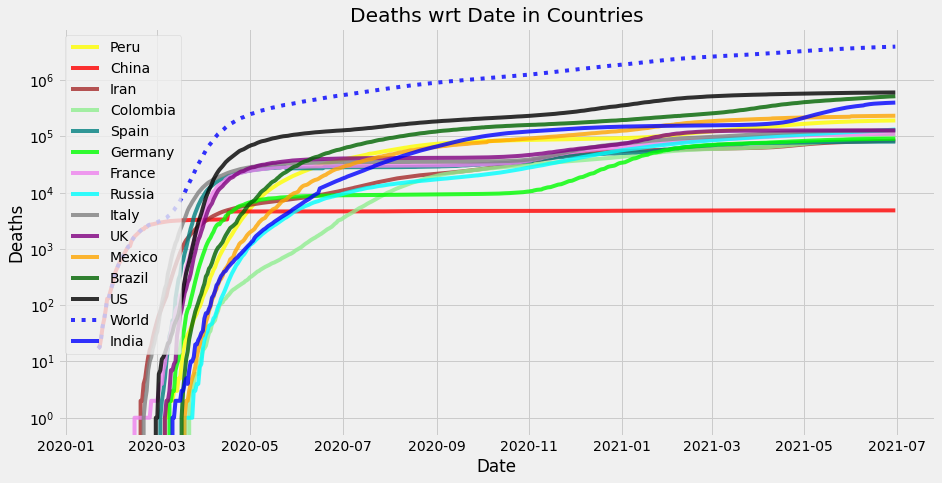

In [12]:
plotter(Deaths, 'Deaths')

### Confirmed Cases

In [13]:
Daily_Confirmed = np.round((Confirmed - Confirmed.shift(1))/1)
Daily_Confirmed = Daily_Confirmed.fillna(0).astype('int')
Daily_Confirmed[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-06-26,50040,362819,7303,64134,5051,17946,838,21312,2128,488,0,33594,7034,16,0
2021-06-27,46148,309889,3920,33704,2384,14633,780,20169,1578,336,0,32376,9758,28,2795
2021-06-28,37566,331944,15083,27804,1661,22723,387,21258,518,341,10179,28478,12351,21,2058
2021-06-29,45951,384746,11596,64903,5711,20261,677,20217,3395,569,7091,25880,12717,10,0
2021-06-30,48786,391839,12872,43836,6105,25670,776,20633,1380,806,9227,27908,11748,14,3950


In [14]:
Confirmed_EWM = np.round(Daily_Confirmed.ewm(com=14).mean().astype(int))
Confirmed_EWM[Countries].tail()

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-06-26,96316,413129,15489,70717,3484,9378,2022,14365,2887,2438,3987,26924,10100,24,3519
2021-06-27,92972,406247,14718,68249,3411,9728,1939,14751,2800,2298,3721,27288,10077,24,3471
2021-06-28,89278,401293,14742,65553,3294,10595,1836,15185,2648,2167,4151,27367,10228,24,3377
2021-06-29,86390,400190,14532,65510,3455,11239,1758,15521,2698,2061,4347,27268,10394,23,3152
2021-06-30,83883,399633,14422,64065,3632,12201,1693,15861,2610,1977,4672,27311,10484,22,3205


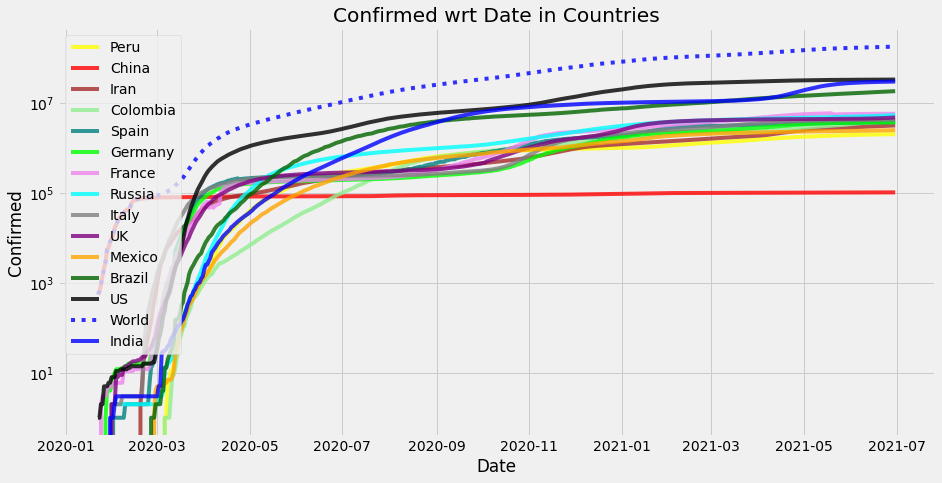

In [15]:
plotter(Confirmed, 'Confirmed')

### Daily Deaths

In [16]:
Daily_Deaths = np.round((Deaths - Deaths.shift(1))/1)
Daily_Deaths = Daily_Deaths.fillna(0).astype('int')
Daily_Deaths[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-06-26,1258,7464,147,1593,175,23,40,610,12,9,0,693,123,-1,0
2021-06-27,979,5947,74,739,43,11,14,591,17,7,0,664,134,0,137
2021-06-28,907,6646,150,618,44,3,28,601,44,58,10,648,140,0,315
2021-06-29,817,8129,331,1893,195,23,42,643,56,57,40,608,142,1,0
2021-06-30,1005,9152,240,2081,244,14,24,659,14,62,46,610,137,0,432


### Exponential Weighted Mean

In [17]:
EWM = np.round(Daily_Deaths.ewm(com=7).mean(), 2)
name = 'Exponential Weighted Mean Weekly'

Weekly_Avg = np.round((Deaths - Deaths.shift(7))/7, 2)
# name = 'Weekly Average Deaths'

AVG = EWM 
# AVG = Weekly_Avg
AVG[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-06-26,1826.38,8917.64,324.22,1899.96,217.66,15.26,41.06,487.51,42.78,65.87,21.73,633.02,129.91,-0.02,231.87
2021-06-27,1720.46,8546.31,292.95,1754.84,195.82,14.73,37.68,500.45,39.56,58.51,19.01,636.89,130.42,-0.01,220.01
2021-06-28,1618.78,8308.77,275.08,1612.74,176.85,13.26,36.47,513.01,40.12,58.44,17.88,638.28,131.62,-0.01,231.88
2021-06-29,1518.56,8286.30,282.07,1647.77,179.11,14.48,37.16,529.26,42.10,58.26,20.65,634.49,132.91,0.11,202.90
2021-06-30,1454.36,8394.51,276.81,1701.92,187.23,14.42,35.51,545.48,38.59,58.73,23.82,631.43,133.42,0.10,231.53


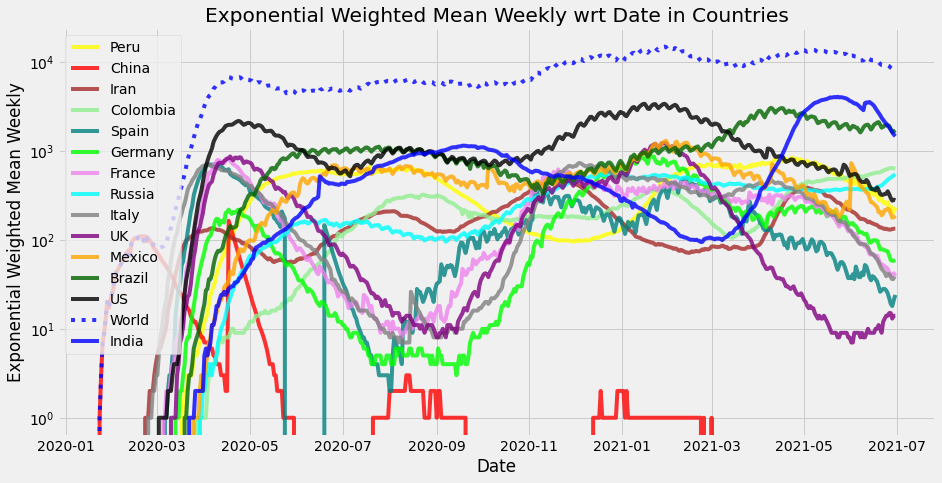

In [18]:
plotter(np.round(AVG), name)

### Stack Plots

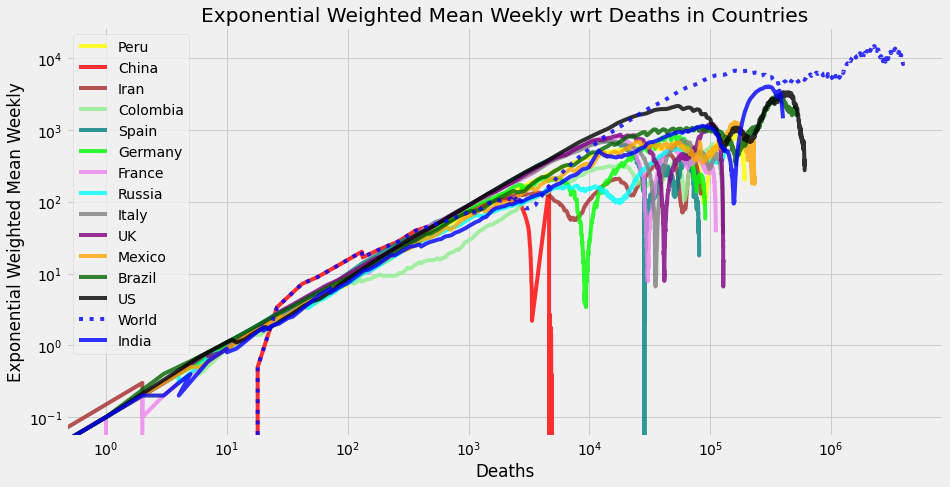

In [19]:
plotwrtDeaths(np.round(AVG, 1), name, Deaths)

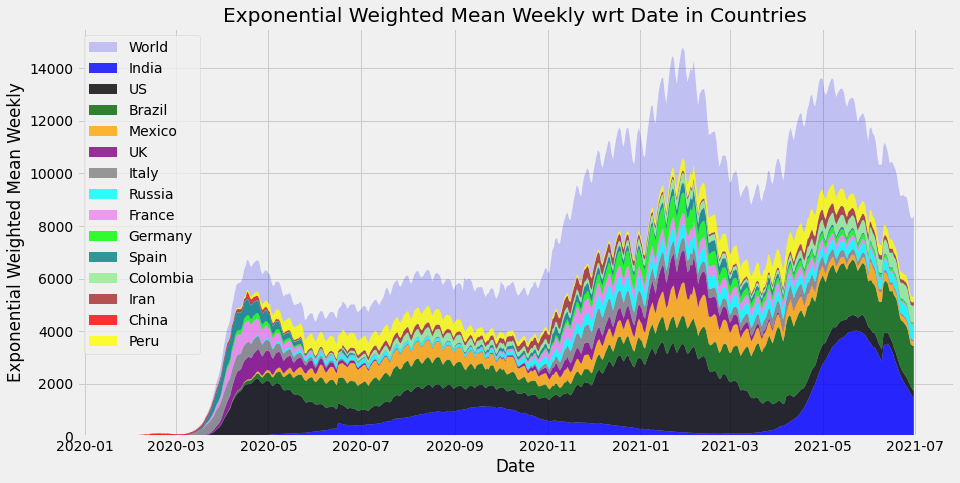

In [20]:
stackplotter(AVG, name)

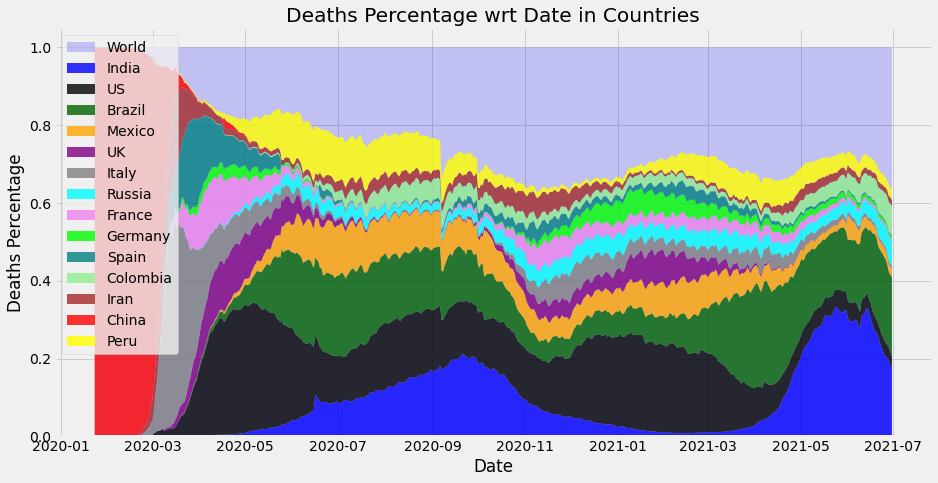

In [21]:
stackplotter(AVG.divide(AVG.World, axis=0), 'Deaths Percentage')

### Reproductivity

In [22]:
Reproductivity = np.round(EWM/EWM.shift(14), 4).clip(lower= 0.1)
Reproductivity[EWM.shift(14) < 12] = 1

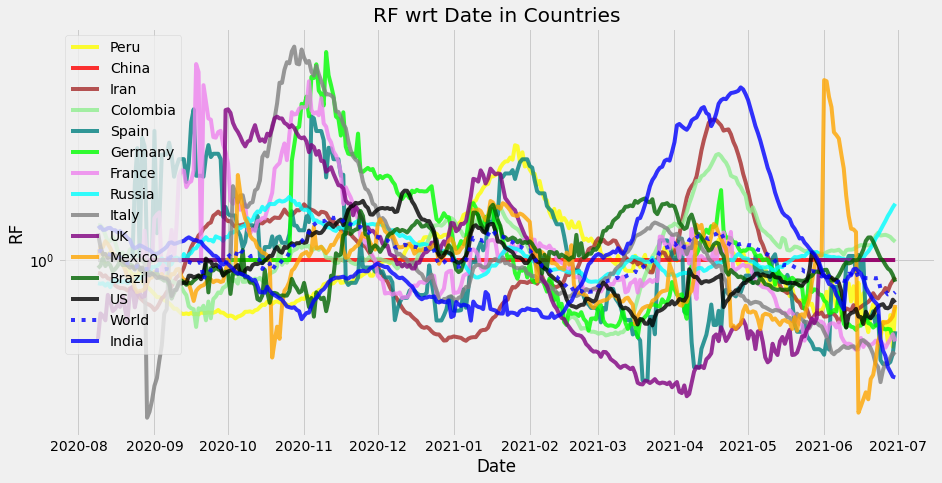

In [23]:
plotter(Reproductivity[200:], 'RF')

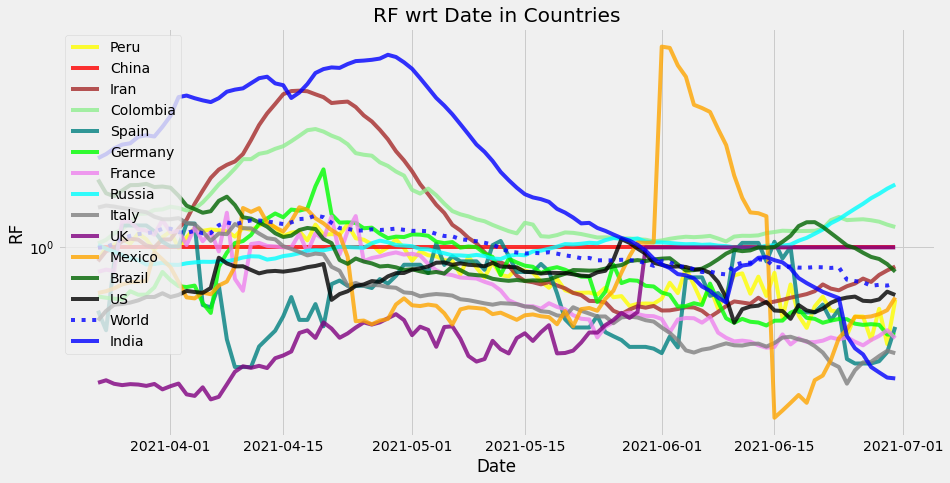

In [24]:
plotter(Reproductivity.tail(100), 'RF')

### Test rate

In [25]:
# We take the mortality to be 0.5%

mortality = 0.005

Testrate = np.round(Confirmed_EWM/(EWM/mortality), 3)
Testrate[EWM < 12] = None

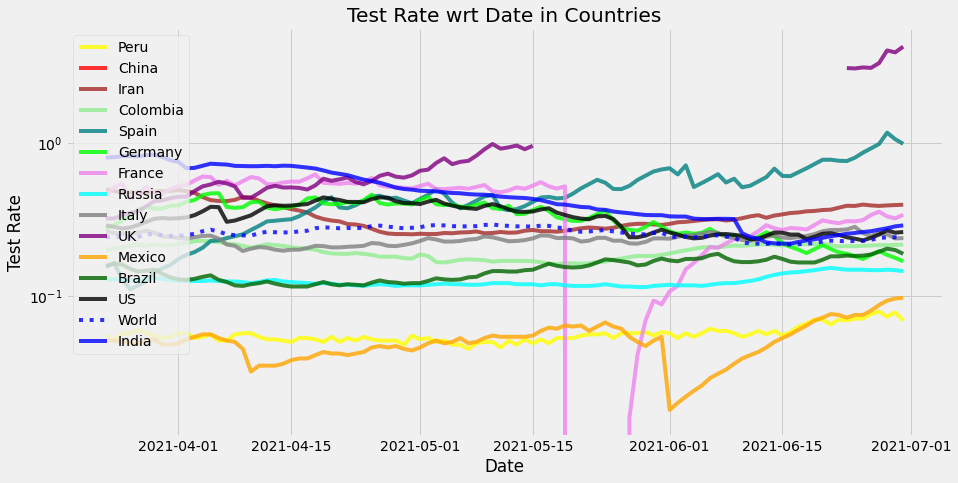

In [26]:
plotter(Testrate.tail(100), 'Test Rate', scale= 'log')

### Time Adjusted for starting day

In [27]:
def adjust_days(DF):
    X = DF.copy()
#     X.reset_index()
    for col in DF.columns:
        L = list(DF[Deaths[col]>5][col])
        X[col] = L + [None for _ in range(len(X[col]) - len(L))]
    return X.reset_index()[DF.columns]
xlabel= 'Days from 5 Deaths'

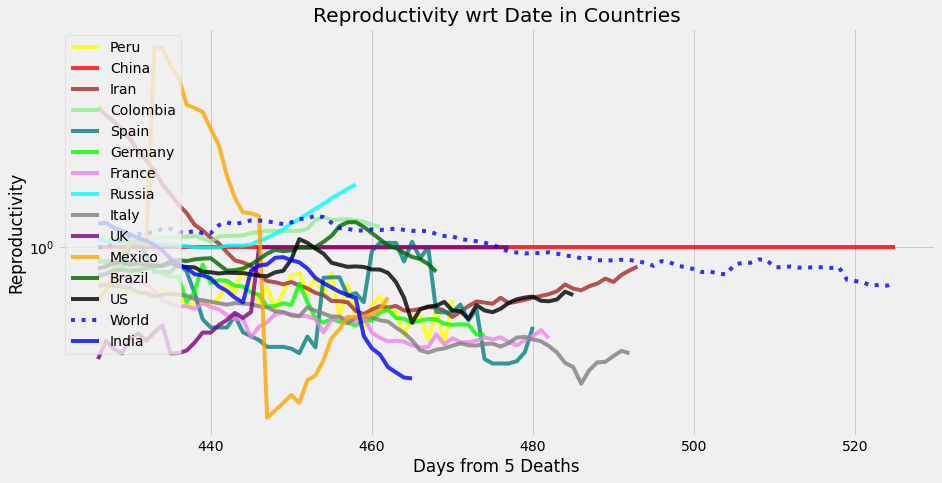

In [28]:
RF_A = adjust_days(Reproductivity)
plotter(RF_A.tail(100), 'Reproductivity', xlabel)

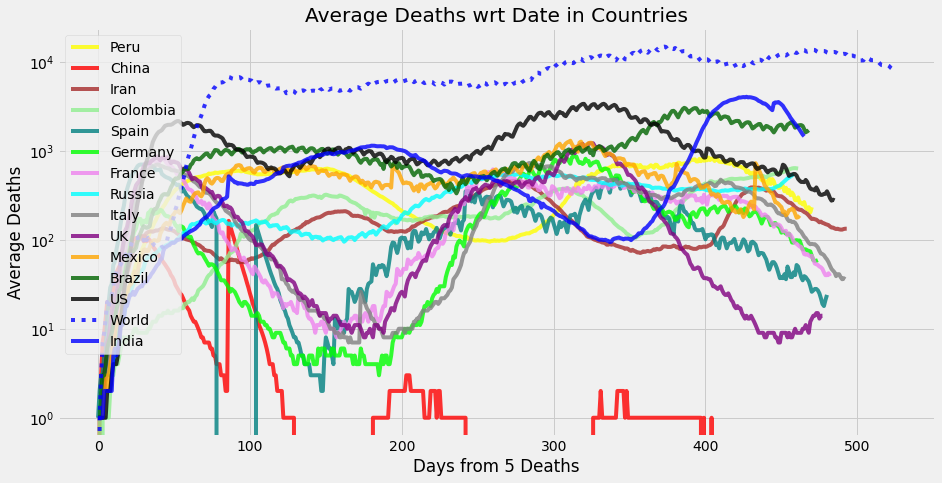

In [29]:
AVG_A = adjust_days(AVG)
plotter(np.round(AVG_A), 'Average Deaths', xlabel)

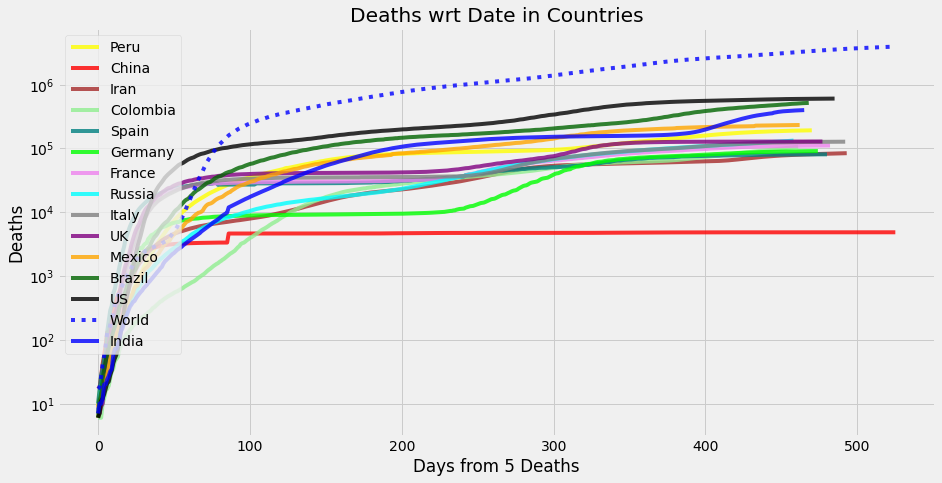

In [30]:
Deaths_A = adjust_days(Deaths)
plotter(Deaths_A, 'Deaths', xlabel)

### Today's Statistics by combining the previous tables

In [31]:
LastDay_DF = pd.DataFrame()
LastDay_DF['Country'] = Deaths.columns
LastDay_DF = LastDay_DF.set_index('Country')

D = {
    'Deaths':Deaths,
    'Daily_Deaths':Daily_Deaths,
    'Weekly_Deaths': Weekly_Avg,
    'EWM7': EWM,
    'Reproductivity':Reproductivity,
    'Confirmed': Confirmed, 
    'Testrate': Testrate,
    'Confirmed_EWM': Confirmed_EWM
    }
for name in D:
    LastDay_DF[name] = D[name].iloc[-1]
LastDay_DF['Estimated(M)'] = np.round((LastDay_DF.Deaths/mortality)/1000000, 2)

In [32]:
LastDay_DF.sort_values('Deaths', ascending = False).head(12)

,Deaths,Daily_Deaths,Weekly_Deaths,EWM7,Reproductivity,Confirmed,Testrate,Confirmed_EWM,Estimated(M)
Country,,,,,,,,,
World,3947020,9152,7880.57,8394.51,0.8064,182202370,0.238,399633,789.40
US,604714,240,254.43,276.81,0.7517,33664970,0.261,14422,120.94
Brazil,518066,2081,1565.29,1701.92,0.8647,18557141,0.188,64065,103.61
India,399459,1005,1068.29,1454.36,0.4555,30411634,0.288,83883,79.89
Mexico,233047,244,171.43,187.23,0.7404,2519269,0.097,3632,46.61
Peru,192331,432,203.57,231.53,0.7301,2052065,0.069,3205,38.47
Russia,132973,659,607.71,545.48,1.4583,5449594,0.145,15861,26.59
UK,128404,14,16.14,14.42,1.0000,4817298,4.231,12201,25.68
Italy,127566,24,30.57,35.51,0.5300,4259909,0.238,1693,25.51


In [33]:
LastDay_DF.sort_values('Weekly_Deaths', ascending = False).head(12)

,Deaths,Daily_Deaths,Weekly_Deaths,EWM7,Reproductivity,Confirmed,Testrate,Confirmed_EWM,Estimated(M)
Country,,,,,,,,,
World,3947020,9152,7880.57,8394.51,0.8064,182202370,0.238,399633,789.40
Brazil,518066,2081,1565.29,1701.92,0.8647,18557141,0.188,64065,103.61
India,399459,1005,1068.29,1454.36,0.4555,30411634,0.288,83883,79.89
Colombia,106544,610,656.71,631.43,1.1303,4240982,0.216,27311,21.31
Russia,132973,659,607.71,545.48,1.4583,5449594,0.145,15861,26.59
Argentina,94304,636,474.00,517.68,0.9155,4470374,0.213,22071,18.86
Indonesia,58491,467,413.86,357.97,1.9740,2178272,0.193,13822,11.70
US,604714,240,254.43,276.81,0.7517,33664970,0.261,14422,120.94
Peru,192331,432,203.57,231.53,0.7301,2052065,0.069,3205,38.47


### Pie Chart

In [34]:
def piechart(name='Deaths', size=12, DF=LastDay_DF):
    plt.figure(figsize = (size, size))
    DF = DF.sort_values(name, ascending = False)
    
    countries = DF.index[1:]
    deaths = DF[name][1:].clip(0, None)
    
    print ('World total: ',int( DF.loc['World'][name]))
    
    plt.pie(deaths, 
            labels= [c +' '+ str(d) for c, d in zip(countries, deaths)], 
            startangle=90,
            counterclock=False,
            autopct='%1.f%%', 
#             pctdistance=0.8
           )
    
    plt.title(name+' piechart for every country')

World total:  3947020


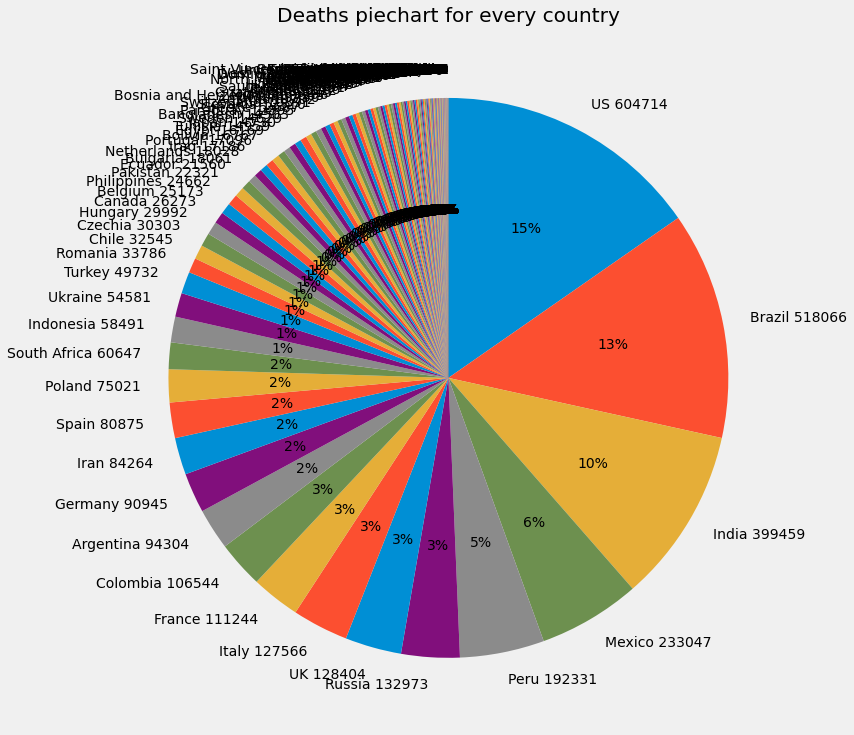

In [35]:
piechart('Deaths')

World total:  7880


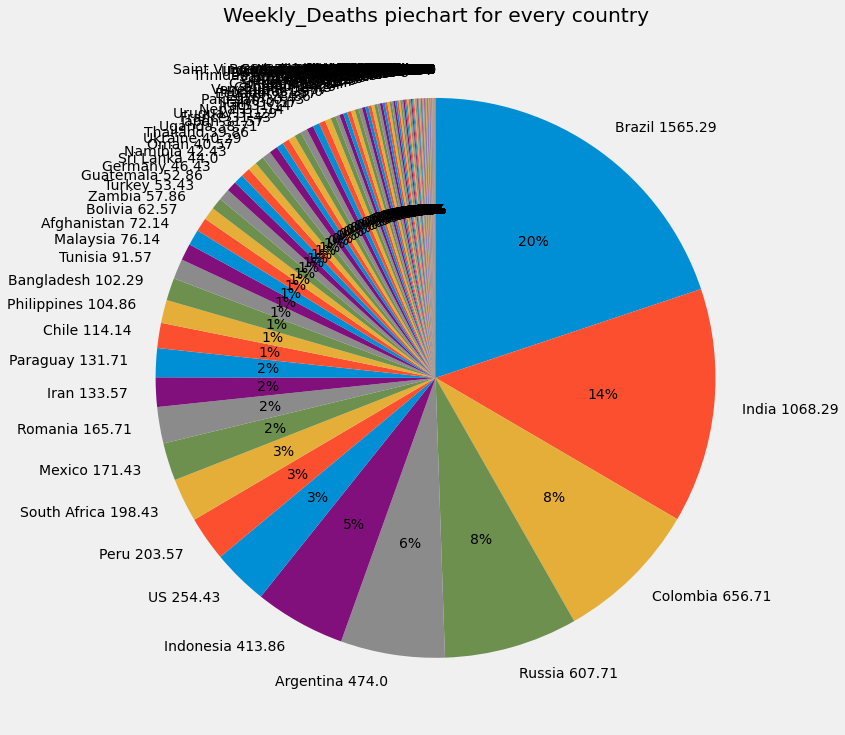

In [36]:
piechart('Weekly_Deaths')

World total:  9152


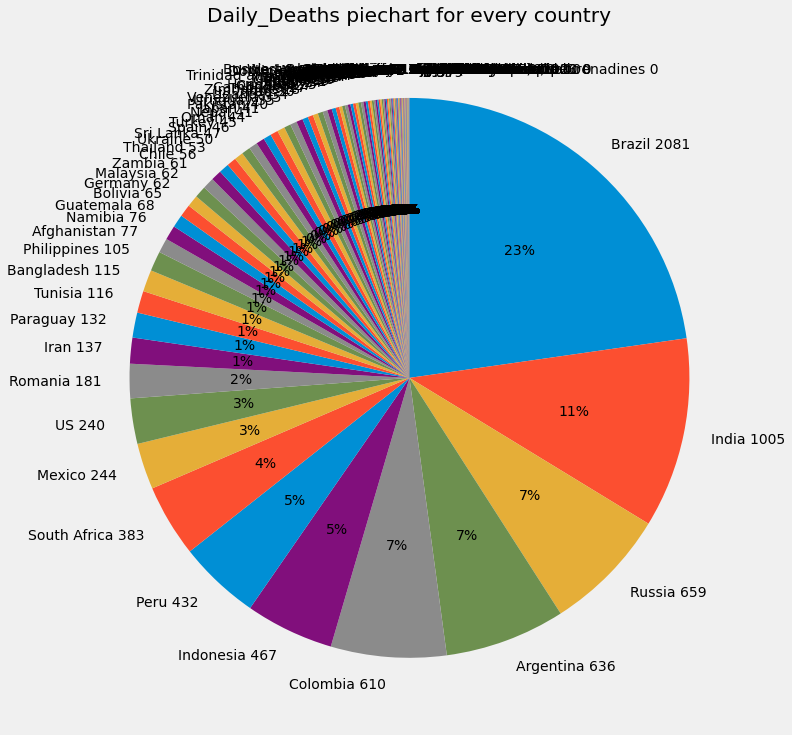

In [37]:
piechart('Daily_Deaths')

In [38]:
print('Today\'s Date: ', dt.datetime.now().date())

Today's Date:  2021-07-01


In [39]:
# Total estimated Cases: 
LastDay_DF.loc['World'].Deaths/mortality

789404000.0

<p>Per Capita deaths are included in this  <a href="https://www.statista.com/statistics/1104709/coronavirus-deaths-worldwide-per-million-inhabitants/" rel="nofollow">Statista</a></p>

In [40]:
!git add .
!git commit -m "`date` update"
!git push origin master

The file will have its original line endings in your working directory


[master 672f09c] `date` update
 1 file changed, 2070 insertions(+), 2125 deletions(-)
 rewrite Simplified Death Statistics SARS-COV2.ipynb (69%)


To https://github.com/Arrowheadahp/COVID-19.git
   4ab5c45..672f09c  master -> master
